## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"/Users/katalysenko/Documents/Airbnb Analysis"

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','df_clean.csv'))

## Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,name,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,0,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1,Skylit Midtown Castle,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,4,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
3,5,Large Cozy 1 BR Apartment In Midtown East,verified,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
4,7,BlissArtsSpace!,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,...,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


In [7]:
df.shape

(84186, 22)

In [8]:
# removed the dollar icon in the price and service fee column so that it does not interfere with our analysis

df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].str.replace('[$,]', '', regex=True).astype(float)

In [9]:
df.head()

,Unnamed: 0,name,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,0,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1,Skylit Midtown Castle,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,4,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
3,5,Large Cozy 1 BR Apartment In Midtown East,verified,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,...,2013.0,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
4,7,BlissArtsSpace!,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,...,2009.0,1060.0,212.0,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


##### Missing values

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                        0
name                              0
host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

##### Duplicates check

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(84186,)

##### Extreme values checks

/var/folders/p4/8yql05j55jlgk_8dqfyzrk2r0000gn/T/ipykernel_25816/2692527252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['minimum nights'], bins=25)


<Axes: xlabel='minimum nights', ylabel='Density'>

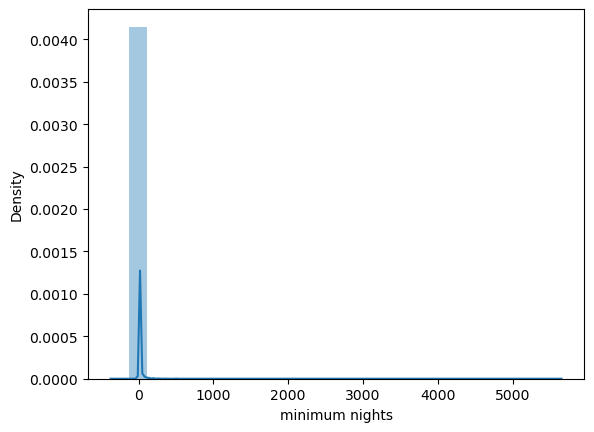

In [13]:
sns.distplot(df['minimum nights'], bins=25) 

In [14]:
df['minimum nights'].mean() 

7.417492219608961

In [15]:
df['minimum nights'].median() 

3.0

In [16]:
df['minimum nights'].max() 

5645.0

## Data prep for regression analysis 

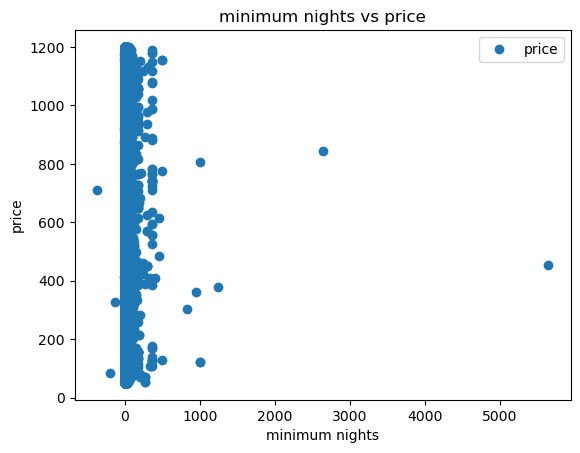

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df.plot(x = 'minimum nights', y='price',style='o')  
plt.title('minimum nights vs price')  
plt.xlabel('minimum nights')  
plt.ylabel('price')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['minimum nights'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [19]:
X

array([[10.],
       [30.],
       [10.],
       ...,
       [ 1.],
       [ 1.],
       [ 2.]])

In [20]:
y

array([[ 966.],
       [ 142.],
       [ 204.],
       ...,
       [1099.],
       [ 837.],
       [ 546.]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [22]:
# Create a regression object

regression = LinearRegression()

In [23]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

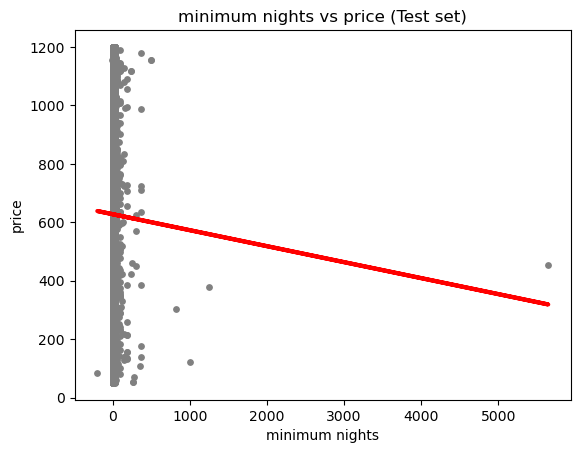

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('minimum nights vs price (Test set)')
plot_test.xlabel('minimum nights')
plot_test.ylabel('price')
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [27]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.05471164]]
Mean squared error:  109051.40751715476
R2 score:  -2.552655400234194e-05


In [28]:
y_predicted

array([[627.35015274],
       [625.76351507],
       [627.24072946],
       ...,
       [627.2954411 ],
       [626.03707329],
       [612.90627877]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,937.0,627.350153
1,574.0,625.763515
2,584.0,627.240729
3,1107.0,627.295441
4,1155.0,627.186018
5,70.0,627.240729
6,1089.0,627.240729
7,560.0,627.186018
8,1142.0,625.763515
9,186.0,625.763515


##### Compare how the regression fits the training set

In [30]:
# predicting X_train

y_predicted_train = regression.predict(X_train)

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.05471164]]
Mean squared error:  110528.43755906243
R2 score:  1.151422242173794e-05


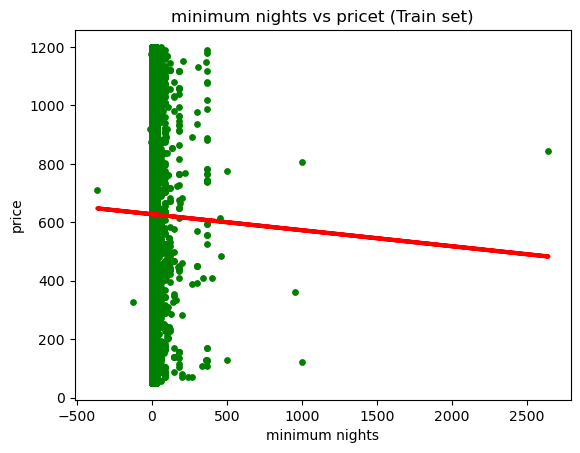

In [33]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('minimum nights vs pricet (Train set)')
plot_test.xlabel('minimum nights')
plot_test.ylabel('price')
plot_test.show()

## Thoughts on how well the model performed on the test set

Model performance on the test set:

The  model performed well on the test dataset. However, upon closer inspection, it became apparent that although the test model performed well, it would not be very useful in our analysis, so I went ahead and created a model for other variables. 

Considerations for data bias:

The dataset showed signs of potential bias, especially in the representation of long-term leases. Such a skewed representation could lead to an  imbalance in the model training process, further research excluding long-term leases could help reduce this bias.